In [ ]:
# CNN

In [4]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
print(mnist)

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\Lakshman\\AppData\\Roaming\\Python\\Python311\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

11490434/11490434 [==============================] - 30s 3us/step


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [7]:
# x_train, x_test = x_train/255.0, x_test/255.0
#1). why to divide by 255
# when we working with image data,the pixel values are integers in the 
# range of [0,255].so, dividing it by 255.0scales these values to the range
# of [0,1]
# working with the smaller values increase the stability of optimization 
# algorithm

# tf.keras.layers.Dense(128, activation='relu'),
#2) why 128
# it is specific number of neurons or units in the 

In [12]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [16]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 16s 4ms/step - loss: 0.2966 - accuracy: 0.9137
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1403 - accuracy: 0.9585
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1058 - accuracy: 0.9676
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0868 - accuracy: 0.9733
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0759 - accuracy: 0.9764


In [14]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)



313/313 [==============================] - 10s 3ms/step - loss: 2.2864 - accuracy: 0.1379


In [15]:
print(test_loss)
print(test_accuracy)

2.2864370346069336
0.1378999948501587


In [17]:
# --------->activation function
# relu
# it is one of the mostly widely used activation function, it replaces all negative
# values with zero, leaving the positive value unchanged

# sigmoid
# sigmoid reduces the output between 0 and 1,making it suitable for 
# binary classification problems

# tanh( hyperbolic tangent):
# it reduces the output between -1 to 1

# softmax
# it is mostly used in output layer

# leaku relu
# it is a another varient of relu that allows a small positive gradient for 
# negative value just to avoid dead neyrons 


In [18]:
# project:
# convert image to greyscale using CNN

import tensorflow as tf
from tensorflow.keras import layers,  models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# Load the RGB image
image_path =  "Pictures\Screenshot (456).png"
original_image = load_img(image_path, target_size=(224, 224))
original_array = img_to_array(original_image)
original_array=original_array/255.0
print(original_array)



[[[0.         0.25490198 0.        ]
  [0.         0.25490198 0.        ]
  [0.         0.25490198 0.        ]
  ...
  [0.5764706  0.52156866 0.5137255 ]
  [0.56078434 0.49803922 0.49411765]
  [0.5411765  0.47843137 0.4745098 ]]

 [[0.         0.25490198 0.        ]
  [0.         0.25490198 0.        ]
  [0.         0.25490198 0.        ]
  ...
  [0.5686275  0.5137255  0.5058824 ]
  [0.5568628  0.49411765 0.49019608]
  [0.5372549  0.4745098  0.47058824]]

 [[0.         0.25490198 0.        ]
  [0.         0.25490198 0.        ]
  [0.         0.25490198 0.        ]
  ...
  [0.56078434 0.5058824  0.49803922]
  [0.54509807 0.48235294 0.47843137]
  [0.5372549  0.4745098  0.47058824]]

 ...

 [[0.         0.25490198 0.        ]
  [0.         0.25490198 0.        ]
  [0.         0.25490198 0.        ]
  ...
  [0.41960785 0.34117648 0.30588236]
  [0.4117647  0.33333334 0.29803923]
  [0.40784314 0.33333334 0.29411766]]

 [[0.         0.25490198 0.        ]
  [0.         0.25490198 0.        ]


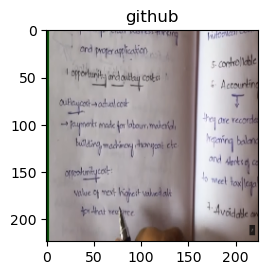

In [27]:
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.title("github")
plt.imshow(original_array)

In [36]:
# convert image to gray scale
model=models.Sequential()
#sequentials()-->it allows us to create alinear stack of layer in a neural networh
#you can add one layer to neiral network at a time and each layer has  connected only to the previous and next layer

model.add(layers.Conv2D(1,(3,3),activation='relu',input_shape=(224,224,3)))
# conv2d-->it represents the 2D conventional layer

# conventional layer--> used to perform element wise
# multiplication or addition or division etc----
#layers.Conv2D(1)--> 1 is used to mention the number of filters in 
# conventional layer
#(3, 3)--> set the size of filter

# (224,224,3)--> 224*224--> pixels with 3 color channel(RGB)
model.add(layers.MaxPooling2D((2,2)))
# maxpooling2D()--> it is used to set the dimensions of input data
# and extract important features from conv2D layer

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 1)       28        
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 1)       0         
 D)                                                              
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 0s 100ms/step


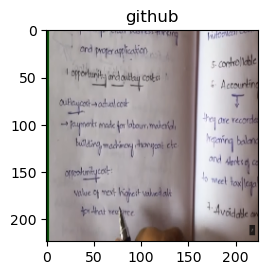

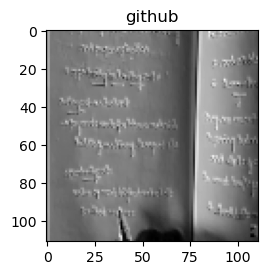

In [39]:
# to reshape the image
input_image = np.expand_dims(original_array, axis=0)
greyscale = model.predict(input_image)

plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.title("github")
plt.imshow(original_array)

plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.title("github")
plt.imshow(np.squeeze(greyscale),cmap='gray')